# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [2]:
# read the titanic train.csv file into a dataframe
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# show the percentage of the passengers that boarded at different ports
train.Embarked.value_counts(normalize = True)



S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

(array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 77. , 133.7, 190.4, 247.1, 303.8, 360.5, 417.2, 473.9, 530.6,
        587.3, 644. ]),
 <BarContainer object of 10 artists>)

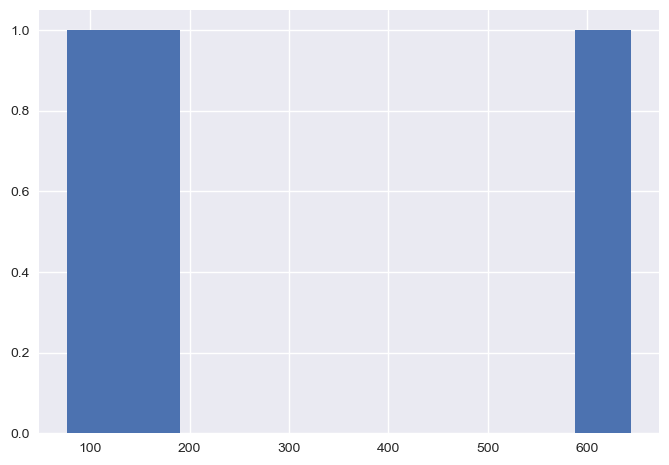

In [116]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
plt.style.use('seaborn')
fig,ax = plt.subplots()
plt.hist(pd.Series(train.Embarked.value_counts()))


![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [77]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.

train_sur = train[train.Survived == 1]

train_sur.Sex.value_counts(normalize = True)









female    0.681287
male      0.318713
Name: Sex, dtype: float64

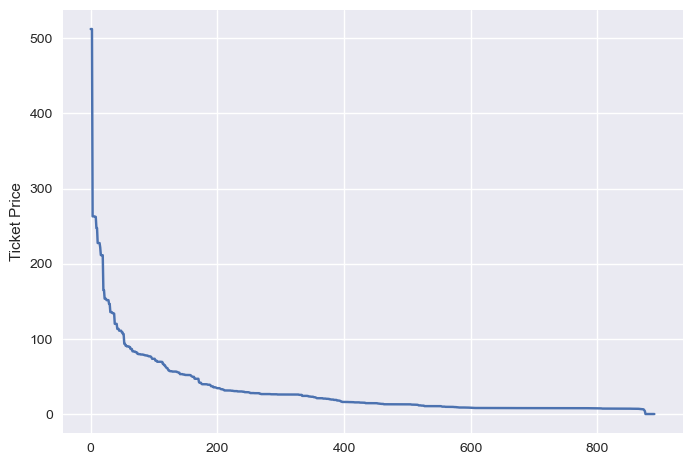

In [67]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
train_s = train.sort_values(by='Fare',ascending = False)
train_s.index = range(len(train))
fig,ax = plt.subplots()
ax.set_ylabel('Ticket Price')
ax.plot(train_s.Fare)

Text(0, 0.5, 'Fare')

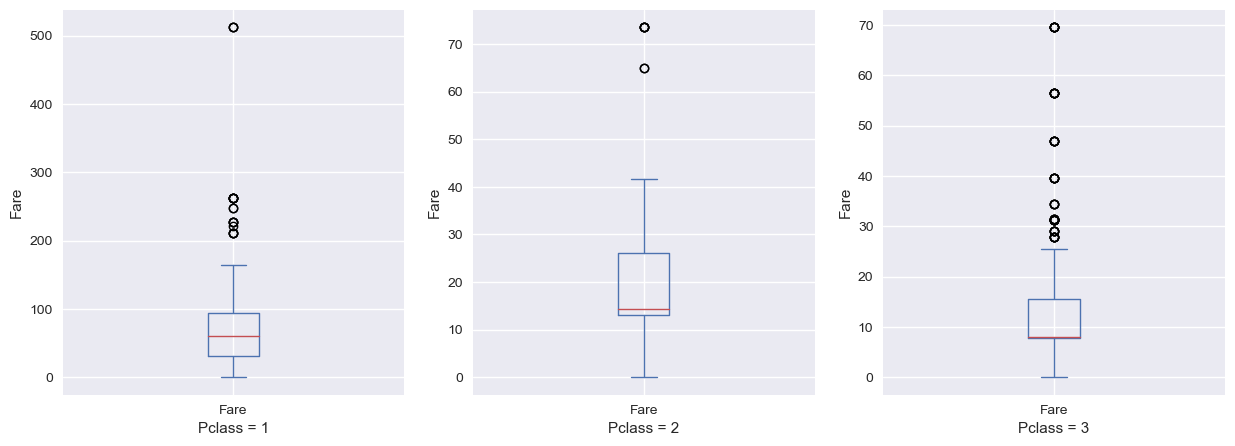

In [66]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below

fig,ax = plt.subplots(1,3,figsize=(15,5))

train[train.Pclass == 1].Fare.plot.box(ax = ax[0])
train[train.Pclass == 2].Fare.plot.box(ax = ax[1])
train[train.Pclass == 3].Fare.plot.box(ax = ax[2])

ax[0].set_xlabel('Pclass = 1')
ax[1].set_xlabel('Pclass = 2')
ax[2].set_xlabel('Pclass = 3')

ax[0].set_ylabel('Fare')
ax[1].set_ylabel('Fare')
ax[2].set_ylabel('Fare')




In [90]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function



Pclass_1 = train[train.Pclass == 1]
Pclass_2 = train[train.Pclass == 2]
Pclass_3 = train[train.Pclass == 3]
sur_rate_1 = len(Pclass_1[Pclass_1.Survived ==1])/len(Pclass_1)
sur_rate_1 = "%.2f%%" % (sur_rate_1 * 100)
sur_rate_2 = len(Pclass_2[Pclass_2.Survived ==1])/len(Pclass_2)
sur_rate_2 = "%.2f%%" % (sur_rate_2 * 100)
sur_rate_3 = len(Pclass_3[Pclass_3.Survived ==1])/len(Pclass_3)
sur_rate_3 = "%.2f%%" % (sur_rate_3 * 100)

print(f'Survival rate of diffrernt classes are:\n class 1: {sur_rate_1}\n class 2: {sur_rate_2}\n class 3: {sur_rate_3}')
print(f'So class 1 has the highest suivival rate,for about {sur_rate_1}.')




Survival rate of diffrernt classes are:
 class 1: 62.96%
 class 2: 47.28%
 class 3: 24.24%
So class 1 has the highest suivival rate,for about 62.96%.


Text(0.5, 0, 'Pclass,Survived')

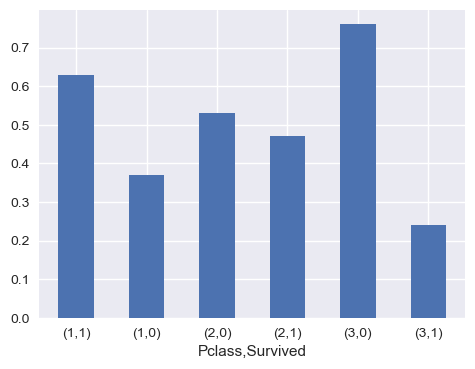

In [113]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
fig,ax = plt.subplots(figsize = (5.5,4))
labels = ['(1,1)','(1,0)','(2,0)','(2,1)','(3,0)','(3,1)']
unsur_rate_1 = len(Pclass_1[Pclass_1.Survived ==0])/len(Pclass_1)
unsur_rate_1 = round( unsur_rate_1,2)
sur_r_1 = round(len(Pclass_1[Pclass_1.Survived ==1])/len(Pclass_1),2)
unsur_rate_2 = len(Pclass_2[Pclass_2.Survived ==0])/len(Pclass_2)
unsur_rate_2 = round( unsur_rate_2,2)
sur_r_2 = round(len(Pclass_2[Pclass_2.Survived ==1])/len(Pclass_2),2)
unsur_rate_3 = len(Pclass_3[Pclass_3.Survived ==0])/len(Pclass_3)
unsur_rate_3 = round( unsur_rate_3,2)
sur_r_3 = round(len(Pclass_3[Pclass_3.Survived ==1])/len(Pclass_3),2)
x= pd.Series(labels)
y = pd.Series([sur_r_1,unsur_rate_1,unsur_rate_2,sur_r_2,unsur_rate_3,sur_r_3])
plt.bar(x,y,width = 0.5)
ax.set_xlabel('Pclass,Survived')











![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
